MultiIndex([('Image',  'Forward', 'Tip Current'),
            ('Image',  'Forward',      'Z-Axis'),
            ('Image', 'Backward', 'Tip Current'),
            ('Image', 'Backward',      'Z-Axis')],
           )
MultiIndex([(       'Tip',                    'Manufacturer'),
            (       'Tip',                            'Name'),
            (       'Tip',                           'Prop0'),
            (       'Tip',                           'Prop1'),
            (       'Tip',                           'Prop2'),
            (       'Tip',                           'Prop3'),
            (       'Tip',                           'Prop4'),
            (       'Tip',                           'Prop5'),
            (       'Tip',                           'Prop6'),
            (       'Tip',                           'Prop7'),
            (       'Tip',                           'Prop8'),
            (       'Tip',                           'Prop9'),
            (       'Tip',    

/var/folders/kx/94yhyxhd7fz53_m_dcz_84nr0000gn/T/ipykernel_47675/1222191141.py:66: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Text(0, 0.5, 'Y')

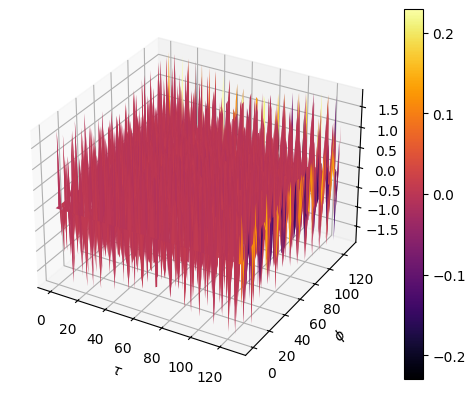

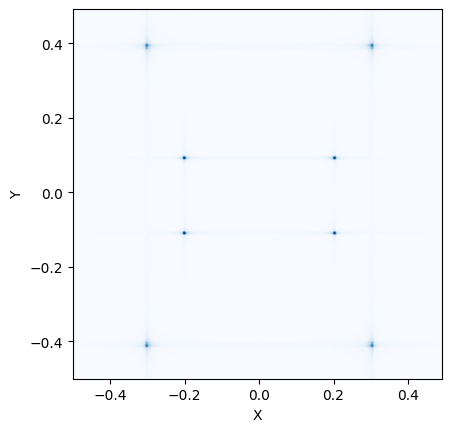

In [112]:
import numpy as np
import NSFopen as ns
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy.fft as fft
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
current_dir = Path(os.getcwd())
parent_dir = current_dir.parent
data_folder = "/Users/thomashartigan/Library/CloudStorage/GoogleDrive-tjh200@cam.ac.uk/My Drive/E2/Images/Initial Testing/Setup A/" #parent_dir.as_posix() +'/Raw_Data/'
#print(data_folder + 'Image04399.nid')
afm = ns.read(data_folder + 'Image04782.nid')
data = afm.data # raw data
param = afm.param # parameters
print(data.keys())
print(param.keys())
a = np.linspace(0,100,100)
print(a)
forward_current = data['Image']['Forward']['Tip Current']
"""
print(param['Scan']['range']) #+ param['X']['units'])
print(forward_current.shape)
print(param)
nx, ny = forward_current.shape
x_linspace = np.linspace(0, param['Scan']['range']['Value'][0], nx)
y_linspace = np.linspace(0, param['Scan']['range']['Value'][1], ny)
X, Y = np.meshgrid(x_linspace, y_linspace)
plt.pcolor(forward_current, cmap = 'Blues')
plt.legend()
plt.show()
plt.imshow(forward_current, cmap = 'Blues')
plt.legend()
plt.show()
image_average = np.mean(forward_current)
image_normalised = forward_current - image_average
plt.plot(image_normalised)#, cmap = 'Blues')
plt.show()
print(np.mean(image_normalised))

imagefft = np.log10(abs(fft.fft2(image_normalised)))
imagefft[imagefft < -8] = -8
print(np.max(imagefft))
print(imagefft)
plt.imshow(imagefft, cmap = 'Blues', interpolation='none')
plt.colorbar()
plt.show() """

fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')

x = np.linspace(0,128,128)
y = np.linspace(0,128,128)
sinx = np.sin(x)
siny = np.sin(y)
sinxsiny = sinx * siny
tau, phi = np.meshgrid(x, y)
amp = np.sin(2*np.pi *tau*0.2)*np.sin(2*np.pi*phi*0.1)+np.sin(2*np.pi*tau*0.3)*np.sin(2*np.pi*phi*0.4)
ax3d.set_xlabel(r'$\tau$')  # tau = omega*t -> adimensional time
ax3d.set_ylabel(r'$\phi$')  # phi -> phase
ax3d.set_zlabel(r'$amp$')   # signal amplitude

surf = ax3d.plot_surface(tau, phi, amp,cmap=cm.inferno)
fig.colorbar(surf)
fig.show()

fig = plt.figure()
fftsins = fft.fft2(amp)
n = len(amp[0])
print(n)
length_step = 1
freq = np.fft.fftfreq(n, d=length_step)
shifted_freqs = fft.fftshift(fftsins)

# print(freq)
# print(shifted_freqs)
# plt.imshow(abs(fftsins), cmap = 'Blues')
# plt.show()

plt.imshow(abs(shifted_freqs), cmap ="Blues", extent=[min(freq), max(freq), min(freq), max(freq)], aspect=1)
plt.xlabel('X')
plt.ylabel('Y')